<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/ML(week3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/house_price_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.shape

(1460, 81)

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
[col for col in df.columns if df[col].isnull().sum()>0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
df.fillna(method="ffill", inplace=True)
print(df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


/tmp/ipython-input-521011602.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [7]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [8]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)
target_col = 'SalePrice'
print(df[target_col].dtype)


Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
int64


In [9]:
df['SalePrice_cat'] = pd.qcut(df[target_col], q=10, labels=False)
print(df['SalePrice_cat'].value_counts())



SalePrice_cat
3    150
7    149
1    149
6    146
0    146
9    145
2    144
8    144
5    144
4    143
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

X_cat = pd.DataFrame()
le = LabelEncoder()

for col in cat_features:
    X_cat[col] = le.fit_transform(df[col].astype(str))

y_cat = df['SalePrice_cat']


In [ ]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(X_cat, y_cat)

chi2_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_score': chi_scores,
    'p_value': p_values
}).sort_values(by='p_value')

print(chi2_results)


          Feature  Chi2_score        p_value
27      HeatingQC  598.877059  3.647712e-123
33     GarageType  442.431203   1.189570e-89
8    Neighborhood  256.225421   4.833023e-50
34   GarageFinish  249.669757   1.171336e-48
21       BsmtQual  175.788572   3.834015e-33
12     HouseStyle  155.370221   6.793218e-29
30    KitchenQual  149.006657   1.416414e-27
3        LotShape  148.984941   1.431157e-27
18      ExterQual  113.405847   2.974141e-20
20     Foundation  109.084255   2.258480e-19
23   BsmtExposure   68.487474   3.011948e-11
11       BldgType   62.978199   3.562442e-10
24   BsmtFinType1   58.648647   2.439850e-09
16    Exterior2nd   53.223388   2.651223e-08
13      RoofStyle   47.593634   3.041731e-07
29     Electrical   43.321200   1.881815e-06
15    Exterior1st   42.084764   3.171344e-06
42  SaleCondition   28.412456   8.136430e-04
37     PavedDrive   23.456816   5.247939e-03
32    FireplaceQu   19.830566   1.898732e-02
7       LandSlope   19.192648   2.360377e-02
28     Cen

In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('SalePrice')
numerical_features.remove('SalePrice_cat')
print("Numerical features:", numerical_features)


Numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [12]:
from sklearn.feature_selection import f_classif
X = df[numerical_features]
y = df['SalePrice_cat']
f_scores, p_values = f_classif(X, y)
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values(by='p_value')
print(anova_results)


          Feature     F_score        p_value
4     OverallQual  305.227853   0.000000e+00
16      GrLivArea  148.347474  2.060816e-198
26     GarageCars  140.750462  1.253715e-190
27     GarageArea  118.199105  2.506044e-166
19       FullBath  114.447711  4.247896e-162
6       YearBuilt  104.606916  9.935935e-151
12    TotalBsmtSF   95.231056  1.659951e-139
13       1stFlrSF   87.483533  6.325321e-130
7    YearRemodAdd   85.346215  3.129556e-127
25    GarageYrBlt   60.983619   8.258560e-95
23   TotRmsAbvGrd   60.719202   1.937411e-94
24     Fireplaces   55.248505   1.108186e-86
8      MasVnrArea   42.731719   3.236329e-68
9      BsmtFinSF1   29.013315   9.287314e-47
20       HalfBath   23.952935   1.637002e-38
29    OpenPorchSF   23.348176   1.626035e-37
28     WoodDeckSF   21.104784   8.522749e-34
14       2ndFlrSF   19.572451   3.084142e-31
2     LotFrontage   16.573607   3.424997e-26
17   BsmtFullBath   12.719889   1.191495e-19
11      BsmtUnfSF   11.595977   9.780205e-18
3         

In [14]:

df=pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
df.shape

(891, 12)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [17]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [18]:
df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [19]:
df=df.drop('Cabin',axis=1)

In [20]:
df=df.drop('Embarked',axis=1)

In [21]:
df=df.drop('Name',axis=1)

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [23]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [24]:
X = pd.get_dummies(X,drop_first=True)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 20  21  22  24  26  35  37  50  51  54  67  68  75  76  80  83  85  88
  93 100 103 104 108 114 124 129 133 136 139 142 144 146 160 161 165 173
 179 180 181 187 189 191 196 197 201 203 204 205 206 209 211 214 220 231
 238 240 247 248 249 254 259 263 264 267 272 279 281 285 287 300 307 312
 318 321 328 329 330 333 338 340 348 351 353 354 358 360 361 364 367 369
 374 377 379 380 382 384 387 395 396 404 413 416 418 419 424 432 437 439
 443 445 446 449 456 457 458 463 466 472 479 484 491 495 496 497 498 507
 509 511 513 514 515 516 517 520 524 527 530 533 536 537 539 549 553 556
 566 571 575 578 579 602 604 605 607 608 618 623 626 628 630 631 633 635
 642 648 649 651 654 655 671 674 675] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:

Text(0.5, 1.0, 'Anova')

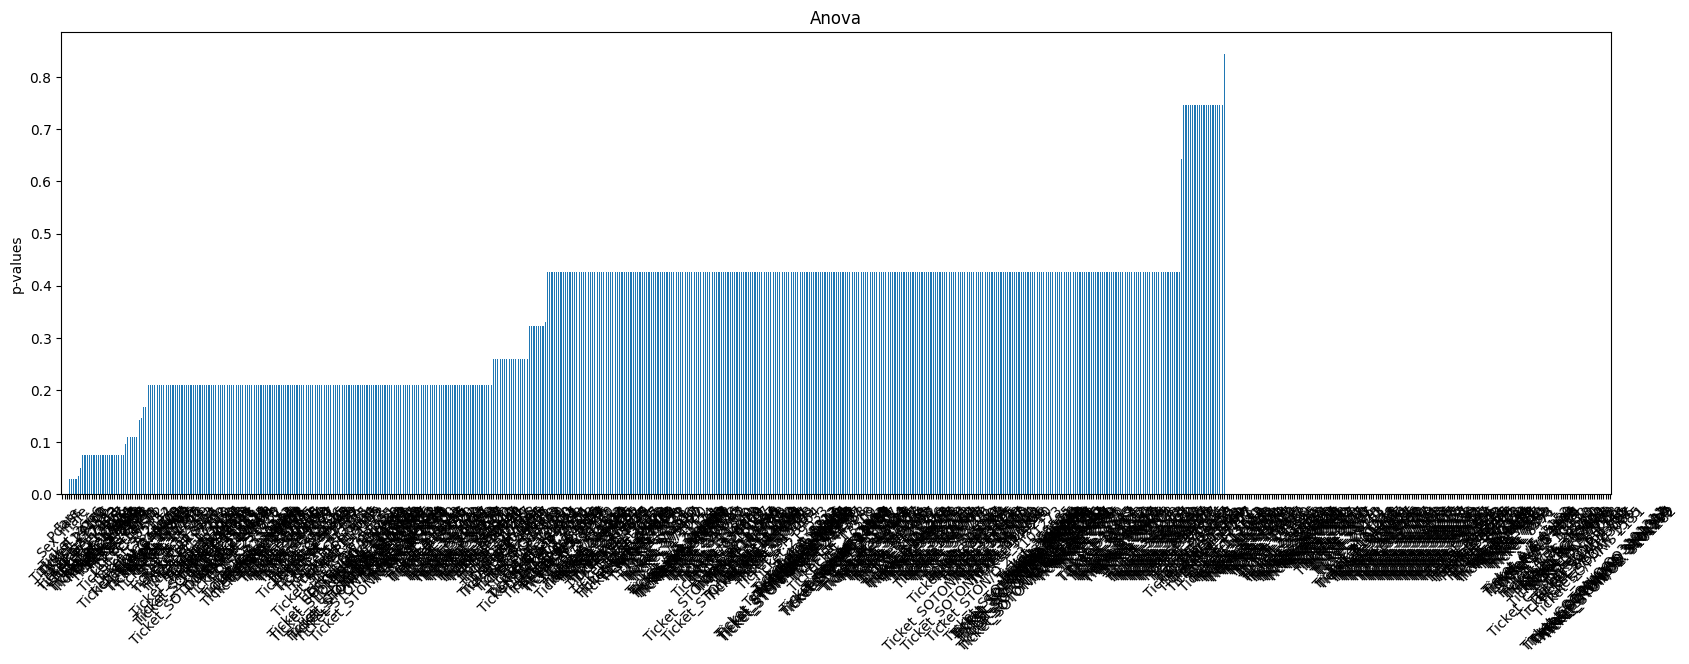

In [26]:
from sklearn.feature_selection import (f_classif,SelectFpr,SelectKBest)
import matplotlib.pyplot as plt
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")

In [27]:
c= pd.crosstab(y_train,x_train['Sex_male'])

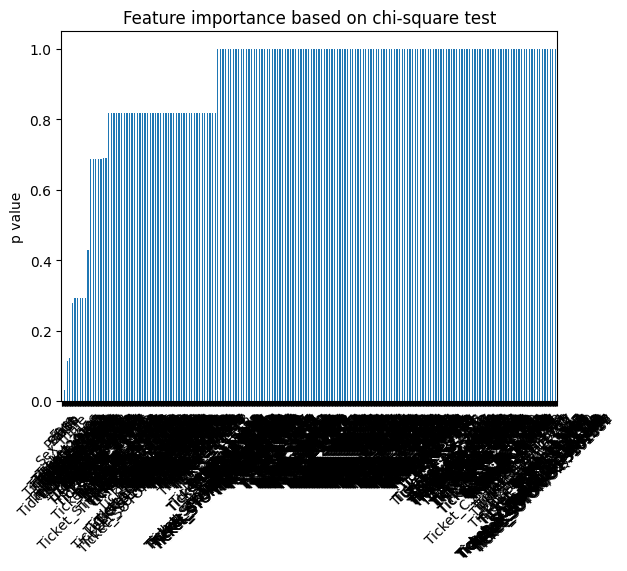

In [28]:
from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

In [29]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

171

In [30]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [31]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In [32]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

0


In [33]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

0


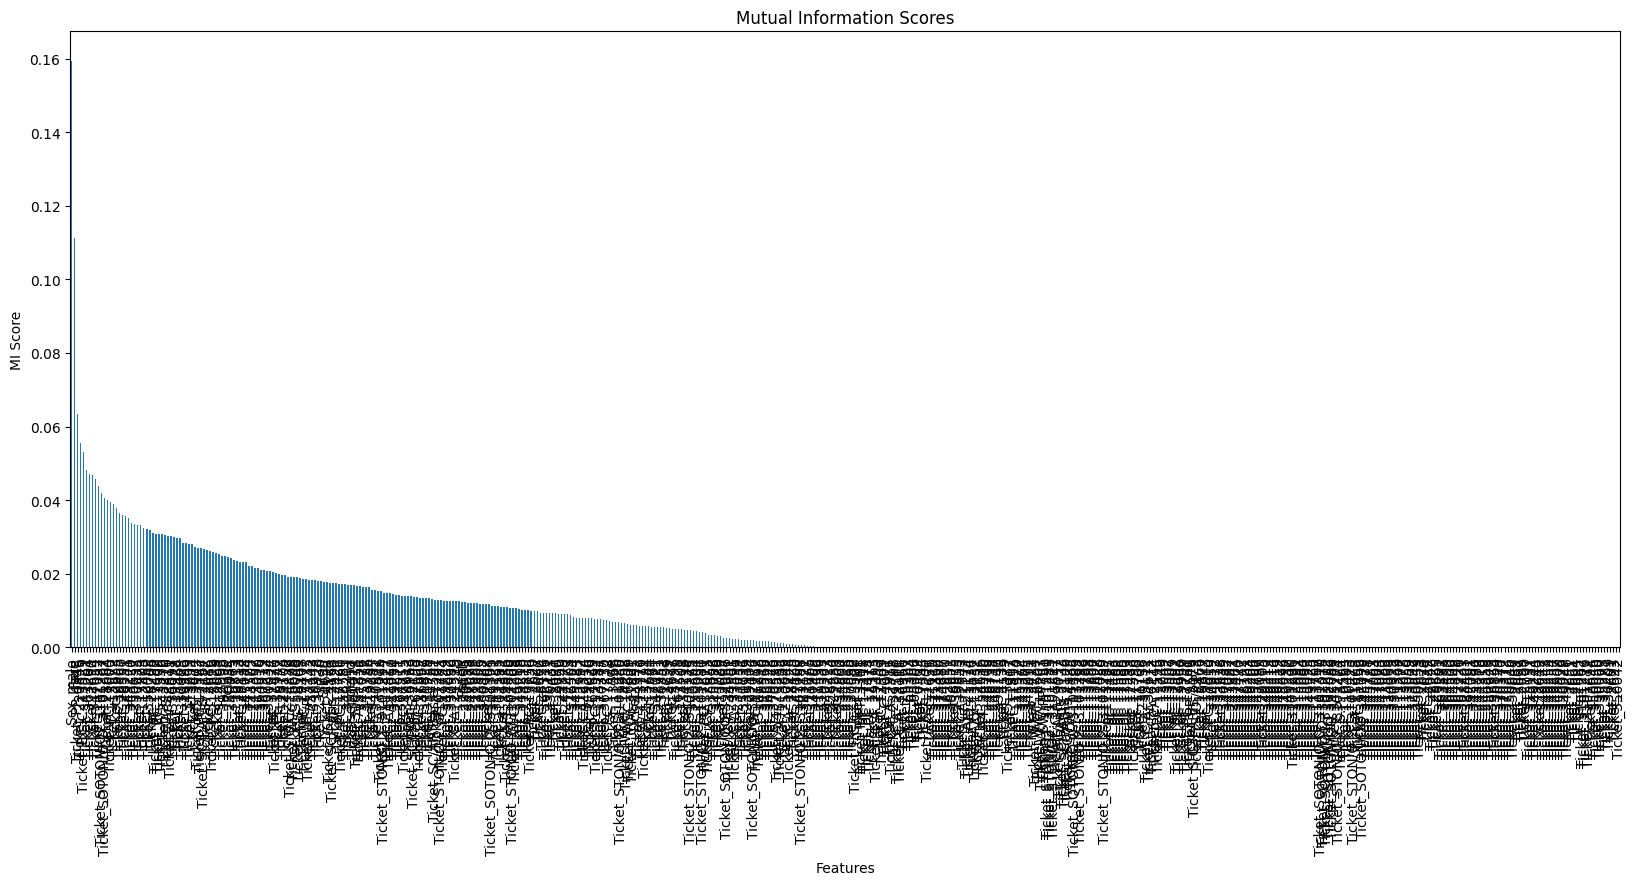

Top 10 Selected Features:
 ['SibSp', 'Fare', 'Sex_male', 'Ticket_113503', 'Ticket_211536', 'Ticket_349201', 'Ticket_350042', 'Ticket_370365', 'Ticket_4579', 'Ticket_W/C 14208']


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

In [42]:
df3=pd.read_csv('/content/drive/MyDrive/Santander Customer Satisfaction_train.csv')
df3.shape

(76020, 371)

In [44]:
with open('/content/drive/MyDrive/Santander Customer Satisfaction_train.csv') as f:
    for i, line in enumerate(f, start=1):
        if i == 2684:
            print(line)
            break

5362,2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,3,0,0,3,3,0,0,0,0,0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3000,0,0,0,0,0,0,0,3000,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,3000,2555.58,3000,2851.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94452.6,0



In [43]:
import pandas as pd
df3 = pd.read_csv('/content/drive/MyDrive/Santander Customer Satisfaction_train.csv', on_bad_lines='skip')
print(df3.shape)
print(df3.isnull().sum().sum())

(76020, 371)
0


In [41]:
[col for col in df3.columns if df3[col].isnull().sum()>0]

[]

In [45]:
for col in df3.columns:
    if df3[col].dtype != 'object':
        df3[col].fillna(df3[col].median(), inplace=True)
    else:
        df3[col].fillna(df3[col].mode()[0], inplace=True)

/tmp/ipython-input-2964411064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna(df3[col].median(), inplace=True)


In [46]:
df3.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [47]:
X = df3.drop('TARGET',axis=1)
y = df3['TARGET']

In [48]:
X = pd.get_dummies(X,drop_first=True)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [50]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

38

In [51]:
x_train.drop(labels=constant_features,axis=1,inplace=True)
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [52]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

108

In [53]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [54]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

10


In [55]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)

In [56]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

98


In [57]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

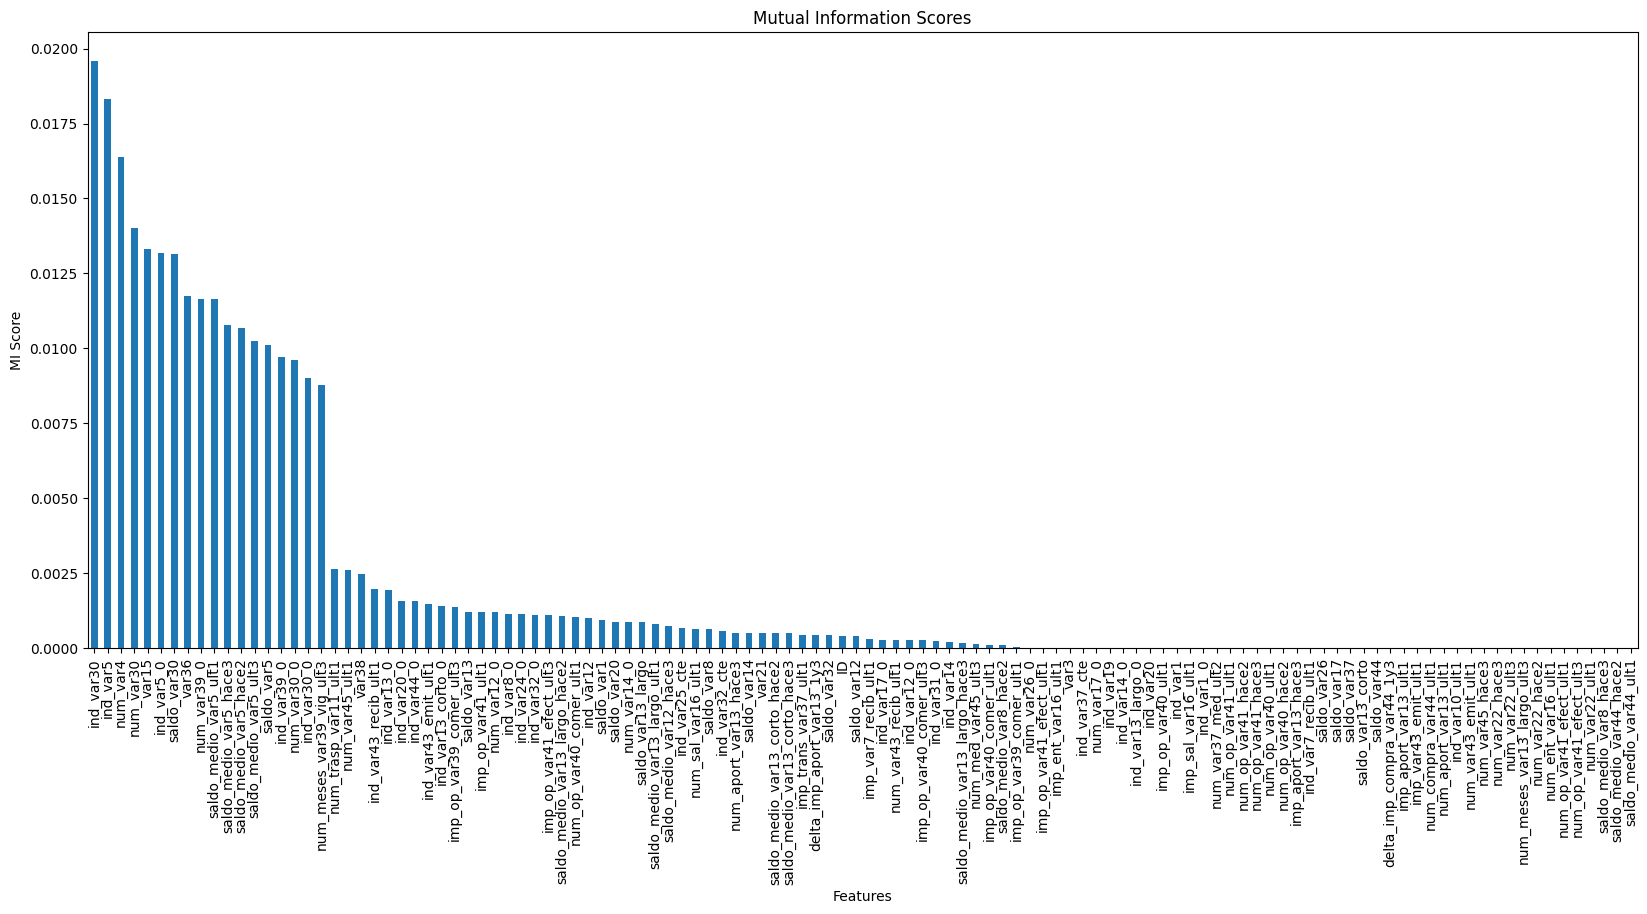

Top 10 Selected Features:
 ['var15', 'ind_var5_0', 'ind_var5', 'ind_var30', 'num_var4', 'num_var30_0', 'num_var30', 'saldo_var30', 'saldo_medio_var5_hace2', 'saldo_medio_var5_ult1']


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

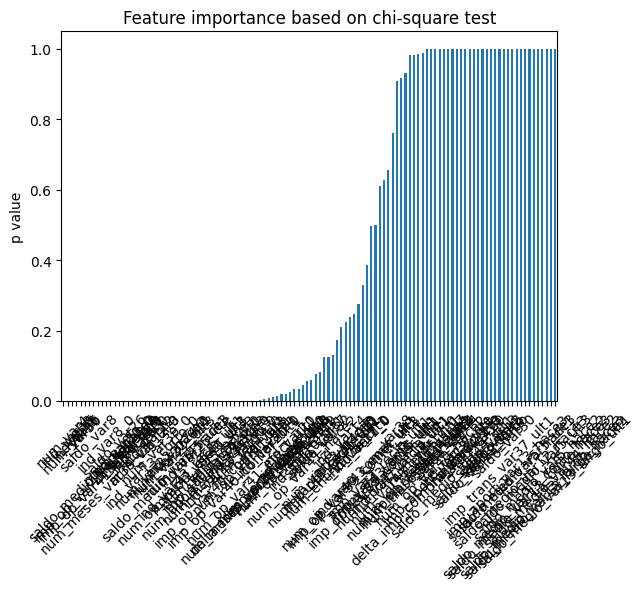

In [59]:
from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

Text(0.5, 1.0, 'Anova')

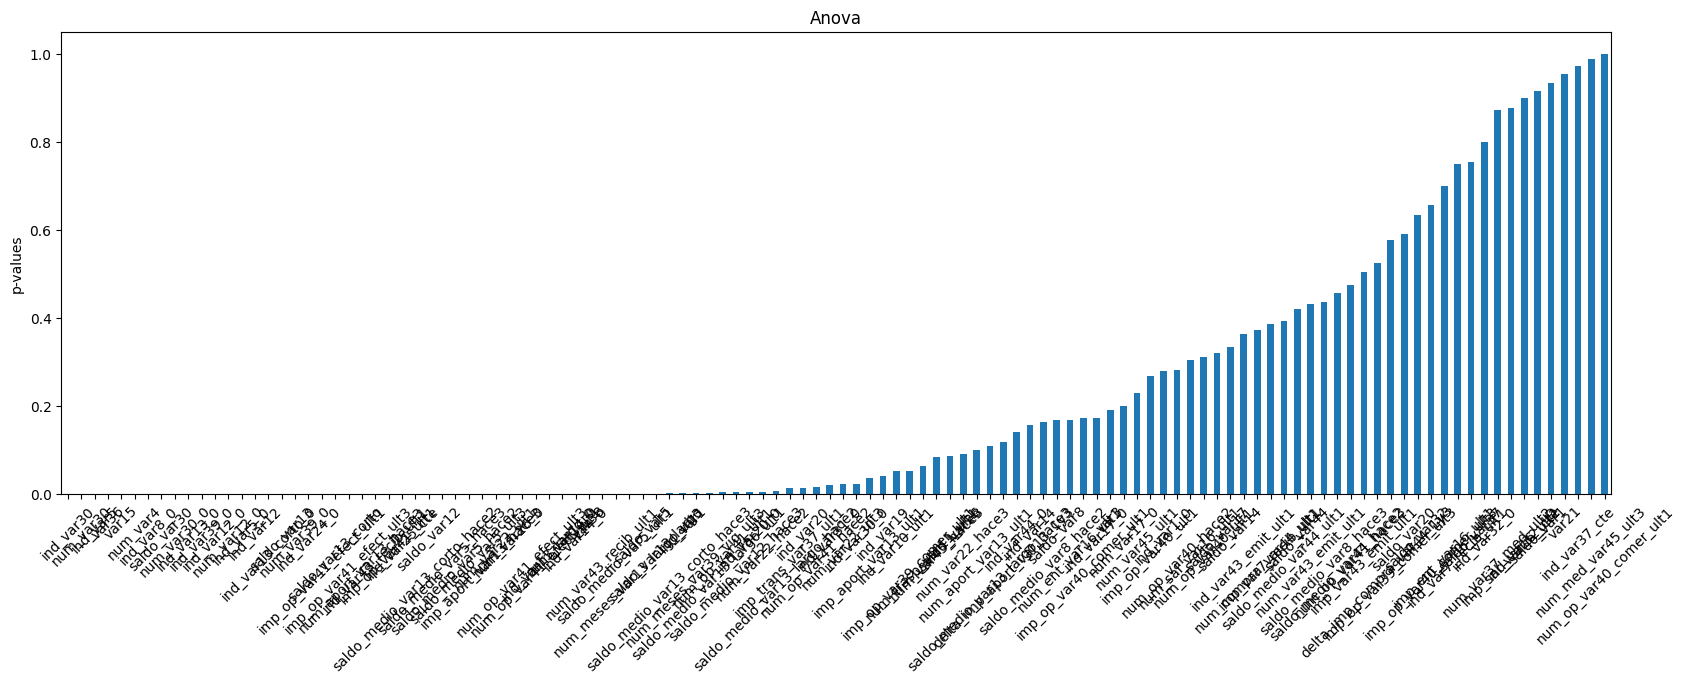

In [60]:
from sklearn.feature_selection import (f_classif,SelectFpr,SelectKBest)
import matplotlib.pyplot as plt
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")